In [ ]:
import pandas as pd
from scipy.stats import kurtosis, skew

In [ ]:
df = pd.read_excel('/content/sp-500-pe-ratio-price-to-earnings-chart.xlsx')
df

,Macrotrends Data Download,Unnamed: 1
0,NaN,NaN
1,S&amp;P 500 PE Ratio - 90 Year Historical Chart,NaN
2,NaN,NaN
3,DISCLAIMER AND TERMS OF USE: HISTORICAL DATA I...,NaN
4,FOR INFORMATIONAL PURPOSES - NOT FOR TRADING P...,NaN
...,...,...
1144,2022-01-01 00:00:00,22.769
1145,2022-02-01 00:00:00,22.055
1146,2022-03-01 00:00:00,22.8439
1147,2022-04-01 00:00:00,20.8347


In [ ]:
df = df.iloc[14:,:]

In [ ]:
df_vals = df.iloc[1:,:]
df_vals

,Macrotrends Data Download,Unnamed: 1
15,1927-12-01 00:00:00,15.9099
16,1928-01-01 00:00:00,14.8898
17,1928-02-01 00:00:00,14.6271
18,1928-03-01 00:00:00,16.339
19,1928-04-01 00:00:00,15.8
...,...,...
1144,2022-01-01 00:00:00,22.769
1145,2022-02-01 00:00:00,22.055
1146,2022-03-01 00:00:00,22.8439
1147,2022-04-01 00:00:00,20.8347


In [ ]:
df_vals = df_vals.set_index(df_vals.columns[0])
df_vals

,Unnamed: 1
Macrotrends Data Download,
1927-12-01,15.9099
1928-01-01,14.8898
1928-02-01,14.6271
1928-03-01,16.339
1928-04-01,15.8
...,...
2022-01-01,22.769
2022-02-01,22.055
2022-03-01,22.8439


In [ ]:
df_yr = df_vals.loc['1928-01-01':'1928-12-31']
df_yr

,Unnamed: 1
Macrotrends Data Download,
1928-01-01,14.8898
1928-02-01,14.6271
1928-03-01,16.339
1928-04-01,15.8
1928-05-01,16
1928-06-01,15.312
1928-07-01,14.8321
1928-08-01,15.9313
1928-09-01,16.1374


In [ ]:
df_yr_mean = df_vals.rolling(window = 12).mean()
df_yr_mean

,Unnamed: 1
Macrotrends Data Download,
1927-12-01,NaN
1928-01-01,NaN
1928-02-01,NaN
1928-03-01,NaN
1928-04-01,NaN
...,...
2022-01-01,25.769275
2022-02-01,25.129842
2022-03-01,24.451017


<Axes: xlabel='Macrotrends Data Download'>

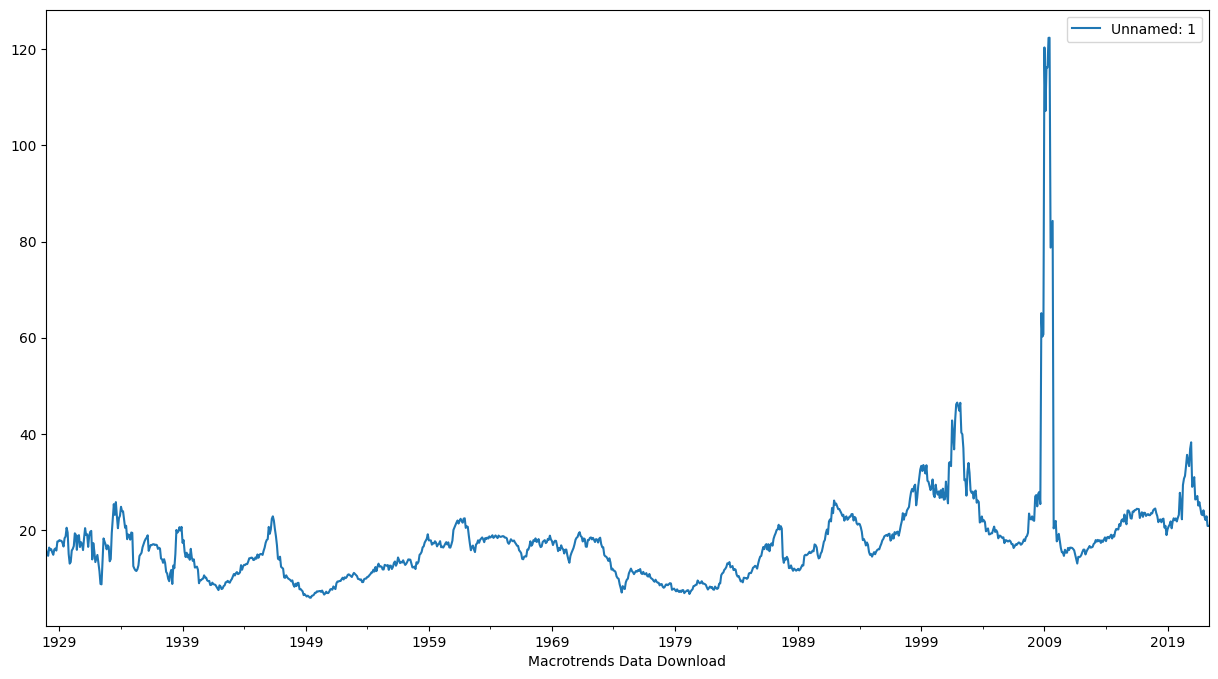

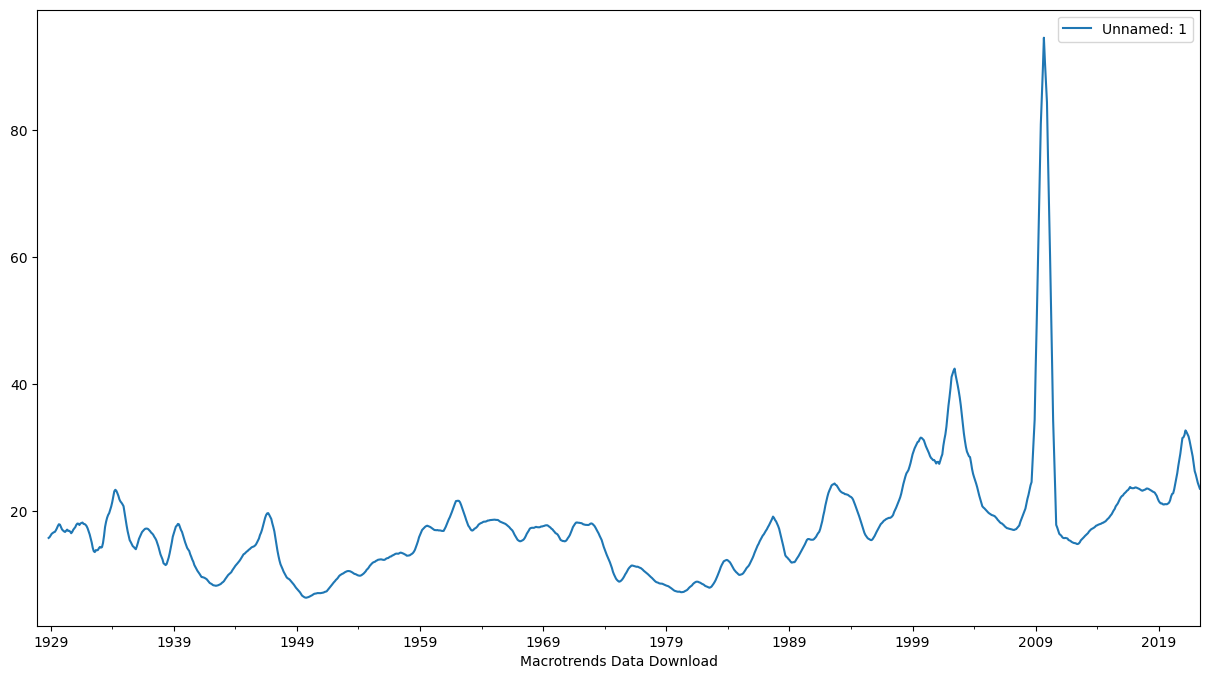

In [ ]:
df_vals.plot(figsize=(15,8))
df_yr_mean.plot(figsize=(15,8))

In [ ]:
df_vals['moving_skewness'] = df_vals[df_vals.columns[0]].rolling(window=256).apply(lambda x: skew(x, nan_policy='omit'))

In [ ]:
df_vals

,Unnamed: 1,moving_skewness
Macrotrends Data Download,,
1927-12-01,15.9099,NaN
1928-01-01,14.8898,NaN
1928-02-01,14.6271,NaN
1928-03-01,16.339,NaN
1928-04-01,15.8,NaN
...,...,...
2022-01-01,22.769,3.955585
2022-02-01,22.055,3.959193
2022-03-01,22.8439,3.960718


<Axes: xlabel='Macrotrends Data Download'>

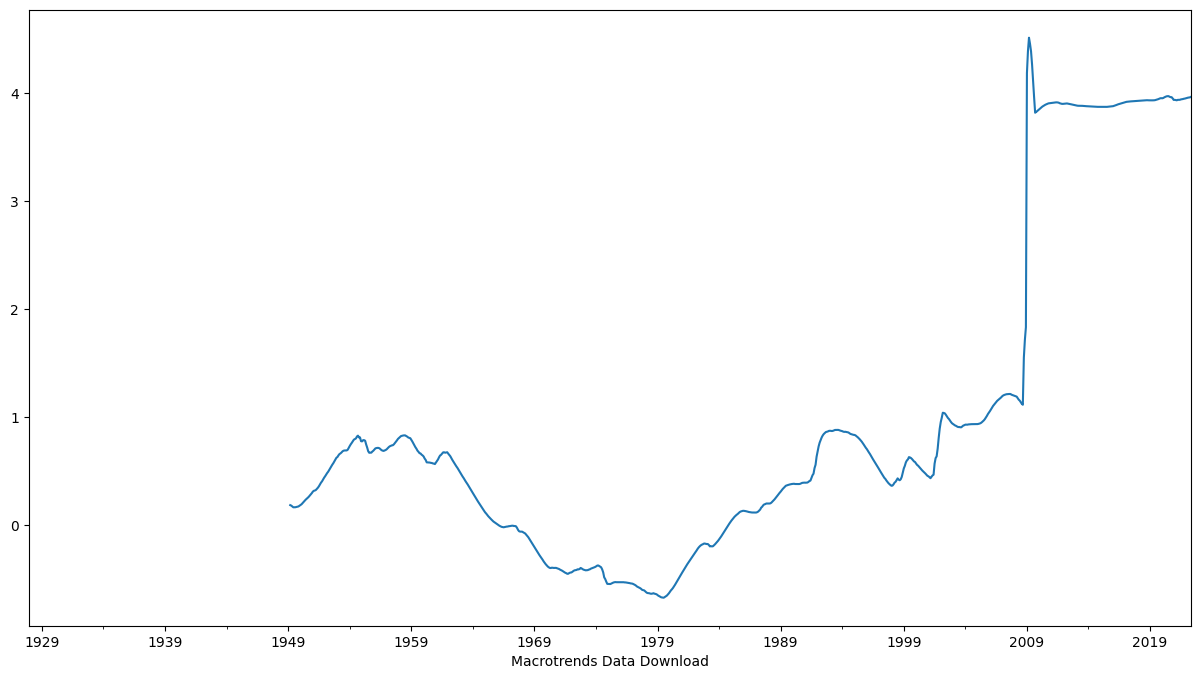

In [ ]:
df_vals['moving_skewness'].plot(figsize=(15,8))

In [ ]:
df_vals['moving_kurtosis'] = df_vals['Unnamed: 1'].rolling(window=256).apply(lambda x: kurtosis(x, nan_policy='omit'))
df_vals['moving_excess_kurtosis'] = df_vals['moving_kurtosis'] - 3  # Excess kurtosis is kurtosis - 3

<Axes: xlabel='Macrotrends Data Download'>

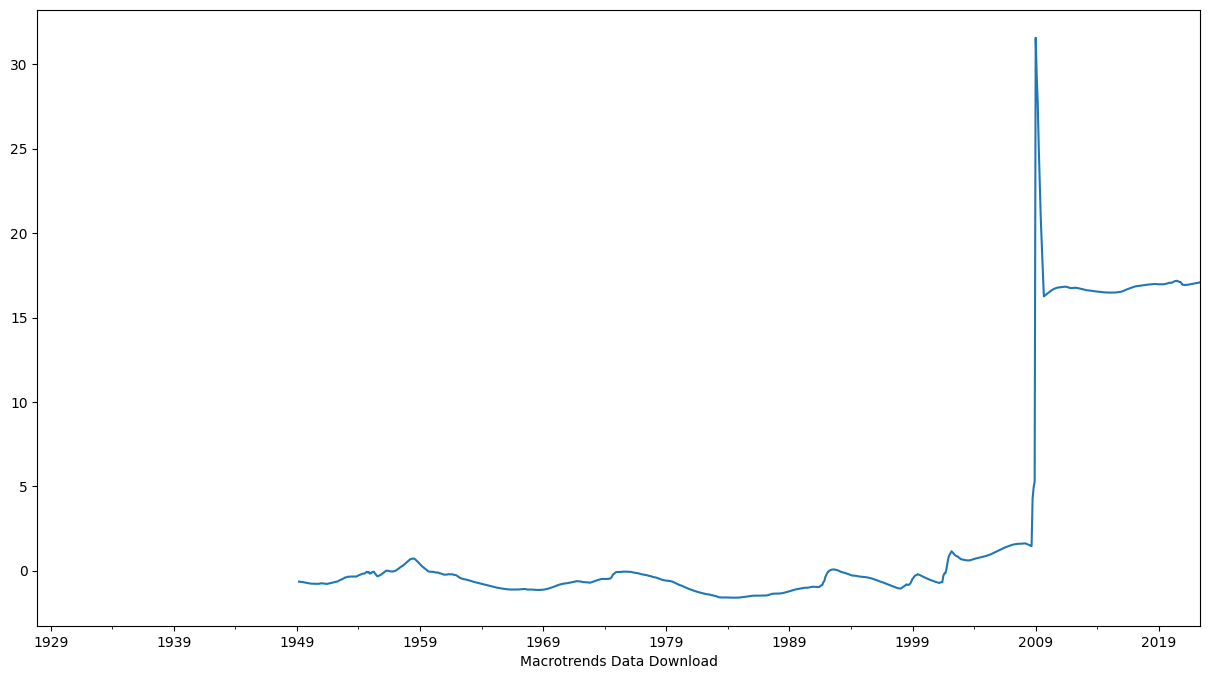

In [ ]:
df_vals['moving_kurtosis'].plot(figsize=(15,8))

<Axes: xlabel='Macrotrends Data Download'>

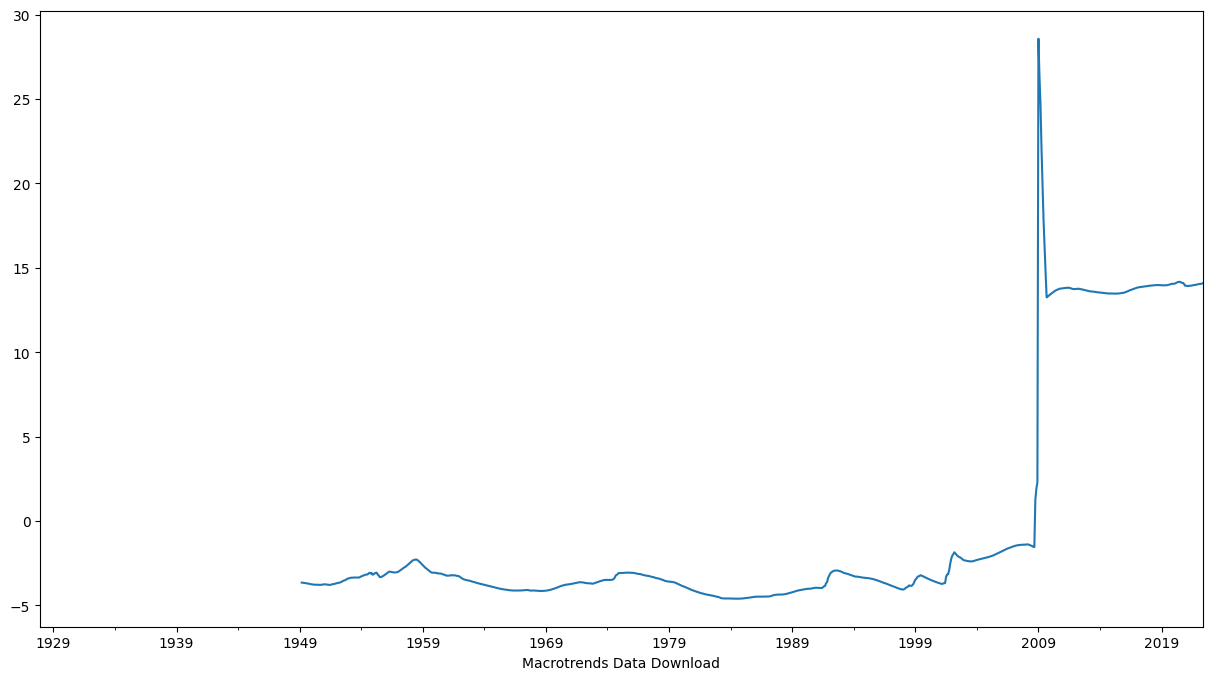

In [ ]:
df_vals['moving_excess_kurtosis'].plot(figsize=(15,8))

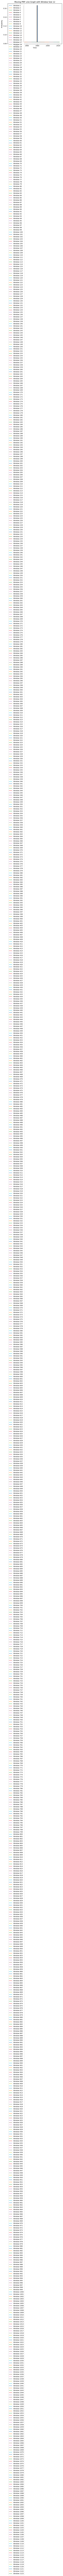

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming df_vals is your DataFrame and "Unnamed: 1" is the column name
# If your data is not discrete, you may need to discretize it first

def moving_pmf(data, window_size):
    pmf_list = []

    for i in range(len(data) - window_size + 1):
        window_data = data.iloc[i:i + window_size]
        values, counts = np.unique(window_data, return_counts=True)
        probabilities = counts / window_size  # Normalize frequencies to get probabilities
        pmf_list.append((values, probabilities))

    return pmf_list

# Replace "Unnamed: 1" with the actual column name in your DataFrame
column_name = "Unnamed: 1"

# Assuming df_vals is your DataFrame
df_vals[column_name] = df_vals[column_name].astype(float)  # Convert the column to float if needed

# Create a time index based on the row numbers or a timestamp column if available
time_index = df_vals.index

# Calculate moving PMF with a window size of 12
window_size = 12
moving_pmf_result = moving_pmf(df_vals[column_name], window_size)

# Plotting the moving PMF as a line graph
for i, (values, probabilities) in enumerate(moving_pmf_result):
    plt.plot(time_index[i:i+window_size][:len(probabilities)], probabilities, label=f'Window {i+1}')

plt.xlabel('Time')
plt.ylabel('Probability')
plt.legend()
plt.title(f'Moving PMF Line Graph with Window Size {window_size}')
plt.show()
